In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
my_year = 2017
my_month = 2
my_day = 2
my_hour = 15
my_min = 30
my_sec = 45

In [4]:
#1 Basic Operations
my_date = datetime(my_year,my_month,my_day)

In [5]:
my_date 

datetime.datetime(2017, 2, 2, 0, 0)

In [6]:
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_min,my_sec)

In [7]:
my_date_time

datetime.datetime(2017, 2, 2, 15, 30, 45)

In [8]:
type(my_date_time)

datetime.datetime

In [9]:
my_date_time.day

2

In [10]:
first_two = [datetime(2017,2,2),datetime(2017,2,4)]

In [11]:
first_two

[datetime.datetime(2017, 2, 2, 0, 0), datetime.datetime(2017, 2, 4, 0, 0)]

In [12]:
type(first_two) #list of datetime.datetime object

list

In [13]:
dt_indx = pd.DatetimeIndex(first_two)

In [14]:
dt_indx

DatetimeIndex(['2017-02-02', '2017-02-04'], dtype='datetime64[ns]', freq=None)

In [15]:
data = np.random.randn(2,2)

In [16]:
cols = ['A','B']

In [17]:
df = pd.DataFrame(data,index=dt_indx,columns=cols)

In [18]:
df

,A,B
2017-02-02,0.486522,2.349758
2017-02-04,-2.716019,-0.086057


In [19]:
df.index.argmax() #index of latest date/max date

1

In [20]:
df.index.max()

Timestamp('2017-02-04 00:00:00')

In [21]:
df.index.min()

Timestamp('2017-02-02 00:00:00')

In [22]:
#2 Time Resampling
df_stock = pd.read_csv('walmart_stock.csv')

In [23]:
df_stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [24]:
type(df_stock.Date[0]) #Currently it isn't a datetime object, so we need to convert it.

str

In [25]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

In [26]:
type(df_stock.Date[0])

pandas._libs.tslib.Timestamp

In [27]:
df_stock.info() # now Date column is converted into datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null datetime64[ns]
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.8 KB


In [28]:
df_stock.set_index('Date',inplace=True)

In [29]:
df_stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [30]:
df_stock.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [31]:
df_stock.resample(rule='A').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [32]:
def first_day(entry):
    return entry[0]

In [33]:
df_stock.resample(rule='A').apply(first_day)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


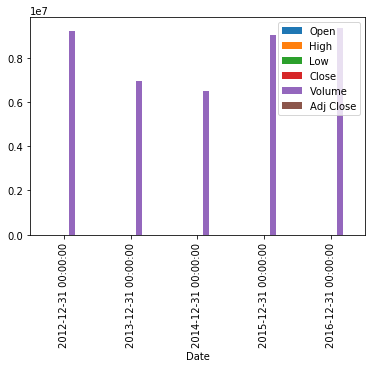

In [34]:
df_stock.resample(rule='A').mean().plot(kind='bar')

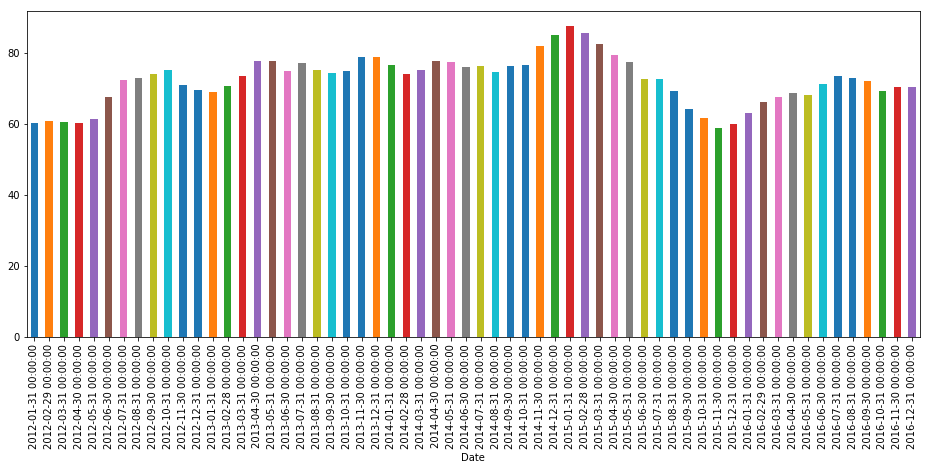

In [35]:
df_stock['Close'].resample(rule='M').mean().plot(kind='bar',figsize=(16,6))

In [36]:
#3 Time Shifts
df_stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [37]:
df_stock.shift(periods=1).head() #Shift forward by one unit and we lose the last index values.

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [38]:
df_stock.shift(periods=-1).tail() #Shift backward by one unit and we lose the first index values.

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-27,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-28,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456
2016-12-29,69.120003,69.430000,68.830002,69.120003,6889500.0,68.615479
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_stock.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


In [40]:
df_stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [41]:
df_stock.tshift(freq='M').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [42]:
#4 Rolling and Expanding
df_stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


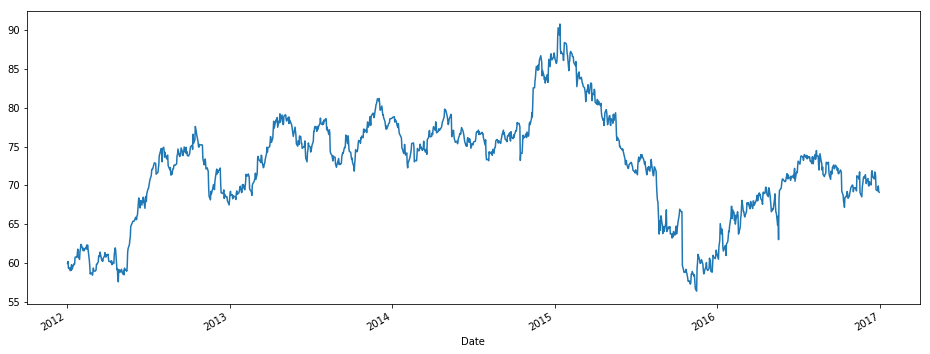

In [43]:
df_stock['Open'].plot(figsize=(16,6))

In [44]:
#Rolling is a function used to calculate a statistic over a predefined number of parameters.
#No of parameters is the window size
#Illustration of moving average over 7 days:
df_stock.rolling(window=7).mean().head(10) 

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


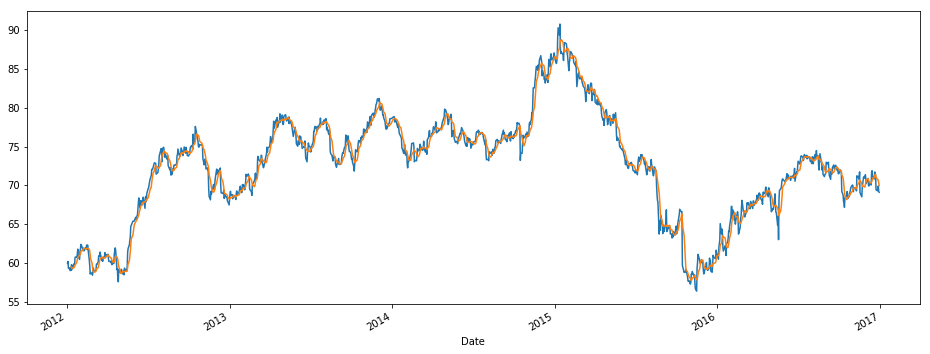

In [45]:
#From the below plot we can observe that the noise is reduced.
#This method is generally used to understand the trends in time-series data.(here,stock data)
df_stock['Open'].plot()
df_stock['Open'].rolling(window=7).mean().plot(figsize=(16,6))

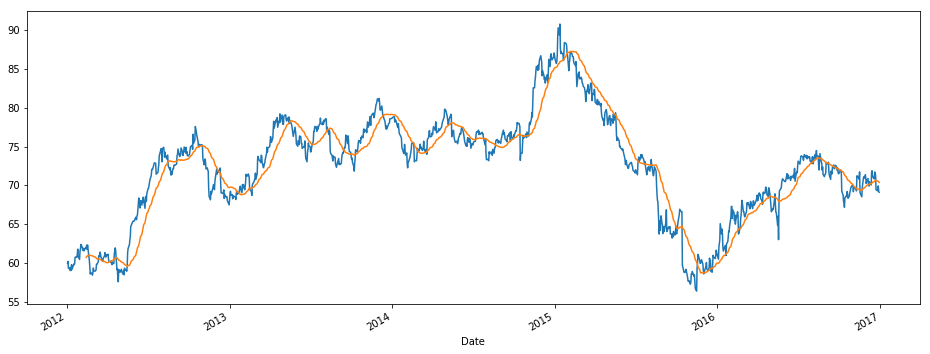

In [46]:
#Larger window size is used to understand the general trend over longer period of time.
df_stock['Open'].plot()
df_stock['Open'].rolling(window=30).mean().plot(figsize=(16,6))

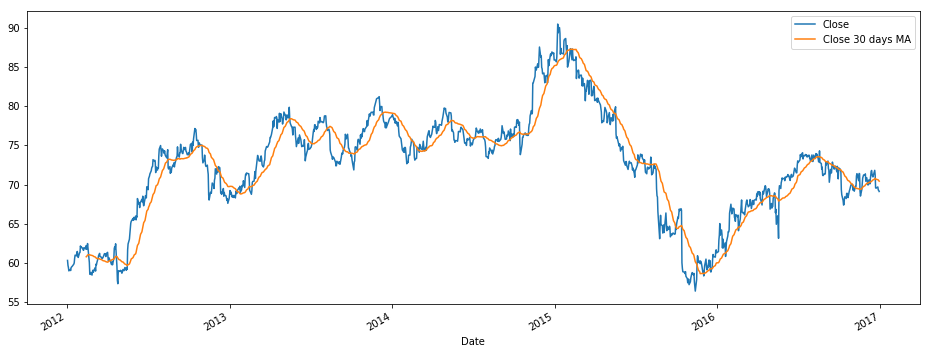

In [47]:
df_stock['Close 30 days MA'] = df_stock['Close'].rolling(window=30).mean()
df_stock[['Close','Close 30 days MA']].plot(figsize=(16,6))

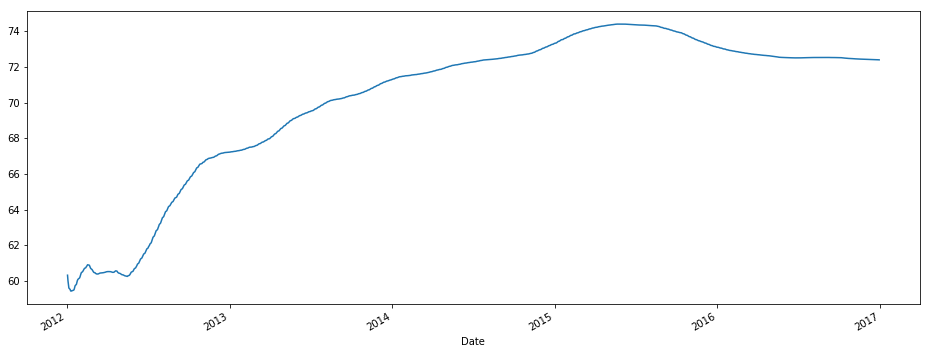

In [48]:
#Expanding takes all the observations from beginning of the time-series to the current point on the
#x-axis and used to calculate a predefined statistic.
df_stock['Close'].expanding().mean().plot(figsize=(16,6))